# COMP 562

Plan for today

1. Review linear regression and gradient ascent
2. Derive closed form solutions for linear regression parameters
4. Illustrate problems with having more parameters than samples
5. Introduce concept of regularization 
6. Ridge regression

$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\loglik}{\log\mathcal{L}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
$$

# Last time -- linear regression

$$
\begin{aligned}
y \given \xx &= \beta_0 + \sum_j x_j \beta_j + \epsilon\\
\epsilon &\sim \Gaussian{}{0, \sigma^2}
\end{aligned}
$$

1. Prediction from the model:
$$
\hat{y} = \beta_0 + \sum_j x_j \beta_j
$$
2. Residual
$$
y - \hat{y} = (\beta_0 + \sum_j x_j \beta_j)
$$
3. Log-likelihood
$$
\loglik(\beta_0,\beta,\sigma^2|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$


# Linear Regression -- terminology

$$
y \given \xx \sim \Gaussian{\beta_0 + \sum_{j=1}^p x_j \beta_j}{ \sigma^2}
$$
* $y$ is a target variable we are modeling 
* $\xx$ is a vector of $p$ features (aka predictors and covariates)
* $\beta_0$ is a **bias** which does not depent on the features
* $\beta_1,\dots,\beta_p$ is a vector of weights (one per feature)
* $\sigma^2$ is variance -- how far can we expect $y$ to be away from $\beta_0 + \sum_{j=1}^p x_j \beta_j$



# Linear Regression -- likelihood and sum of squares

Ignoring $\sigma^2$ for a moment Log-likelihood for linear regression is:
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$

We aim to maximize it because this will yield the parameters for which the data is most probable.


On the board, we will show that maximizing log-likelihood is equivalent to minimizing **sum of squared errors**
$$
RSS = \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$
and minimizing **mean squared error**
$$
MSS = \frac{1}{N}\sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$


# Linear regression -- finding MLE $\beta_0$ and $\beta$

Our goal was to find $\beta_0,\beta$ such that
$$
\nabla f(\xx) = \left[
\begin{array}{c}
\frac{\partial}{\partial \beta_0} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) \\
\frac{\partial}{\partial \beta_1} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) \\
\vdots\\
\frac{\partial}{\partial \beta_p} \log\likelihood(\beta_0,\beta,\sigma^2\given\xx,\yy) 
\end{array}\right] = \left[
\begin{array}{c} 
0\\
0\\
\vdots \\
0 
\end{array} \right]
$$
because this guarantees that the likelihood can not be further improved -- probability of data is maximized.

# Gradient Ascent
Once we are sure that the gradients are correct -- by comparing them to finite difference approximation --, we can proceed to optimize the function.

The algorithm we introduced is called **gradient ascent** or **gradient descent** depending on whether we are maximizing or minimizing a function.

The **gradient ascent** algorithm iterates update:
$$
\theta^{(\textrm{iteration}+1)} = \theta^{(\textrm{iteration})} + s \nabla f(\theta^{(\textrm{iteration})})
$$
The **gradient descent** algorithm iterates updates:
$$
\theta^{(\textrm{iteration}+1)} = \theta^{(\textrm{iteration})} - s \nabla f(\theta^{(\textrm{iteration})})
$$

Our implementation of gradient ascent performed **line-search** to find the step size.




In [1]:
def gradient_ascent(f,x,init_step,iterations):  
    f_val,grad = f(x)                           # compute function value and gradient 
    f_history = [f_val]
    x_history = [x]
    for it in range(iterations):                # iterate for a fixed number of iterations
        done = False                            # initial condition for done
        line_search_it = 0                      # how many times we tried to shrink 
        step = init_step                        # reset step size to the initial size
        while not done and line_search_it<100:  # are we done yet?
            new_x = x + step*grad               # take a step along the gradient
            new_f_val,new_grad = f(new_x)       # evaluate function value and gradient
            if new_f_val<f_val:                 # did we go too far?
                step = step*0.95                # if so, shrink the step-size
                line_search_it += 1             # how many times did we shrink
            else:
                done = True                     # better than the last x, so we move on
        
        if not done:                            # did not find right step size
            print("Line Search failed. Iteration: ",it)
            break
        else:
            f_val = new_f_val                   # ah, we are ok, accept the new x
            x = new_x
            grad = new_grad
            f_history.append(f_val)
            x_history.append(x)
    return f_val, x, f_history, x_history

def plot_optimization_trace(fun, x_history):
    # Plotting the optimization trace
    last_x = last_y = None
    x = y = numpy.arange(-5.0,7.0,0.1)
    X,Y = numpy.meshgrid(x,y)
    F,_ = fun([X,Y])
    plt.subplot(1,2,1)
    plt.contour(X,Y,F,levels=numpy.arange(numpy.min(F),numpy.max(F),2))

    for xs in x_history:
        x,y = xs
        plt.plot(x,y,'ro')
        if not last_x is None:
            plt.plot([x,last_x],[y,last_y])
        last_x,last_y = x,y

    plt.subplot(1,2,2)
    plt.plot(f_history)
    plt.xlabel('Iterations')
    plt.ylabel('Function value')
    plt.tight_layout()

Line Search failed. Iteration:  73


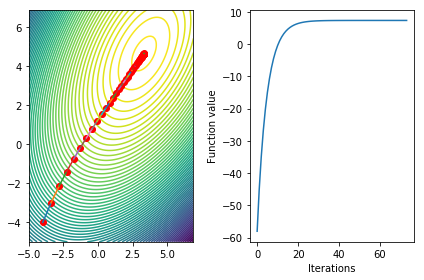

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

def f(xs):
    x,y = xs
    f = -(x-1.0)**2.0 - (y-3.0)**2.0 + 0.999*x*y
    dfdx = -2.0*(x-1.0) + 0.9999*y
    dfdy = -2.0*(y-3.0) + 0.99999*x
    grad = numpy.asarray([dfdx,dfdy])
    return f,grad

start_x = numpy.asarray([-4.0,-4.0])
f_opt,x_opt,f_history,x_history = gradient_ascent(f,
                                                  x=start_x,
                                                  init_step=0.1,
                                                  iterations=100)
plot_optimization_trace(f,x_history)

# Linear Regression -- gradient of log-likelihood

$$
\nabla \loglik(\beta_0,\beta,\sigma^2\given\xx,\yy) = \left[\begin{array}{c} 
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-1) \\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_1 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,1}) \\
\vdots\\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,p})
\end{array}
\right]
$$

In [3]:
def linear_regression_log_likelihood(Y,X,betas,sigma2=1.0):
    ll = 0
    beta0 = betas[0]
    beta = betas[1:]
    dlldbeta0 = 0
    dlldbeta = numpy.zeros(len(beta))    
    for (x,y) in zip(X,Y):
        ll = ll -0.5*numpy.log(2*numpy.pi*sigma2)        
        res = y - beta0 - numpy.sum(x*beta)
        ll = ll - 1.0/(2.0*sigma2)*(res**2.0)
        dlldbeta0 = dlldbeta0 - 1.0/sigma2*res*(-1)
        dlldbeta = dlldbeta - 1.0/sigma2*(res*(-x))
    grad = numpy.zeros(len(beta)+1)
    grad[0] = dlldbeta0
    grad[1:] = dlldbeta
    return ll, grad

# Linear regression -- matrix form

We can write out our math a bit more compactly using matrix notation.

First,recall inner product:
$$
\xx^T\beta = \sum_{j=1}^p x_j
\beta_j
$$





We can compactly rewrite 
$$
y \given \xx \sim \Gaussian{\beta_0 + \sum_{j=1}^p x_j \beta_j}{ \sigma^2}
$$
as
$$
y \given \xx \sim \Gaussian{\beta_0 + \xx^T\beta}{ \sigma^2}
$$

# Linear regression -- matrix form
Log-likelihood
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$
as
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \xx_i^T\beta)\right)^2\right]
$$

# Linear regression -- matrix form

We can also rewrite log-likelihood a lot more compactly by using this notation
$$
\zz^T\zz = \sum_{j=1} z_j^2
$$

Our log-likelihood
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \xx_i^T\beta)\right)^2\right]
$$
after using the above
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \xx_i^T\beta)\right)^T\left(y_i-(\beta_0 + \xx_i^T\beta)\right)\right]
$$

# Linear regression -- matrix form
$$
\loglik(\beta_0,\beta|\yy,\xx) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \xx_i^T\beta)\right)^T\left(y_i-(\beta_0 + \xx_i^T\beta)\right)\right]
$$
after splitting the sum
$$
\begin{aligned}
\loglik(\beta_0,\beta|\yy,\xx) =& -\sum_{i=1}^N \frac{1}{2}\log 2\pi\sigma^2 \\
&-\frac{1}{2\sigma^2}\sum_{i=1}^N \left(y_i-(\beta_0 + \xx_i^T\beta)\right)^T\left(y_i-(\beta_0 + \xx_i^T\beta)\right)
\end{aligned}
$$

Further, let $X$ be a matrix of size $n \times p$ where $i^{\tth}$ row is $\xx_i$. 
Let $\yy$ be a (column-)vector of length $n$ with entries $y_i$. 
Let $\ones_N$ denotes $N$ long column-vector of 1s.
Then log-likelihood can be written as

$$
\begin{aligned}
\loglik(\beta_0,\beta\given\yy,\xx) = &-\frac{N}{2}\log 2\pi\sigma^2 \\
&+ \frac{1}{2\sigma^2}(\yy - (\beta_0\ones_N + X\beta))^T(\yy - (\beta_0\ones_N + X\beta))
\end{aligned}
$$

# Linear regression -- matrix form

For the time being we drop $\beta_0$
$$
\loglik(\beta\given\yy,\xx) =  \frac{1}{2\sigma^2}(\yy -  X\beta)^T(\yy -  X\beta) + \textrm{const.}
$$

A bit of matrix calculus:
$$
\nabla_\beta (\yy - X\beta)^T(\yy - X\beta) = 2X^T(\yy-X\beta)
$$

Hence:
$$
\nabla \loglik(\beta\given\yy,\xx) = \frac{1}{\sigma^2}X^T(\yy-X\beta)
$$

Compare this to the gradient we computed in a pedestrian way:
$$
\nabla \loglik(\beta_0,\beta,\sigma^2\given\xx,\yy) = \left[\begin{array}{c} 
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-1) \\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_1 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,1}) \\
\vdots\\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)(-x_{i,p})
\end{array}
\right]
$$

# Linear regression -- closed form solution for $\beta$
Equating the gradient to zero
$$
\frac{1}{\sigma^2}X^T(\yy-X\beta) = 0
$$
yields
$$
\beta^{\textrm{MLE}} = (X^TX)^{-1}X^T\yy
$$
We will work this out on the board.

# Linear regressions -- $\beta_0$ and $\sigma^2$

We know how to find
$$
\arg\min_\beta  \frac{1}{2\sigma^2}(\yy -  X\beta)^T(\yy -  X\beta) + \textrm{const.}
$$

Q: Can we use this to solve
$$
\arg\min_\beta  \frac{1}{2\sigma^2}(\yy -  \beta_0 - X\beta)^T(\yy - \beta_0 -  X\beta) + \textrm{const.}?
$$

We will work this out on the board.

# Linear regressions -- $\beta_0$ and $\sigma^2$

We noticed that $\sigma^2$ had no impact on the estimation of $\beta$ or $\beta_0$.

However, $\beta_0$ and $\beta$ have impact on estimating $\sigma^2$.

Original log-likelihoood
$$
\sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2\right]
$$
Taking derivative and equating it to zero yields
$$
(\sigma^{\MLE})^2 = \frac{1}{N} \sum_{i=1}^N \left(y_i - (\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$

# Linear Regression -- closed form

Let $X$  be a matrix of size $n\times p$  where $n$  is number of examples and $p$  is number of features.

Let $\yy$ be a (column-)vector of length $n$.

Given these data we can fit a linear regression model
$$
y  \beta_0 + \beta^0 + \xx^T\beta + \epsilon
$$
Closed form solutions for $\beta$s and $\sigma^2$ are:

$$
\begin{aligned}
\left[
\begin{array}{c}
\beta^{\MLE}_0\\
\beta^{\MLE}_1\\
\vdots \\
\beta^{\MLE}_p 
\end{array}
\right] &= (X_1^TX_1)^{-1}X_1^T\yy\\
(\sigma^{\MLE})^2 &= \frac{1}{N} \left(\yy - \beta^{\MLE}_0 \mathbf{1}_n - X\beta^{MLE}\right)^T\left(\yy - \beta^{MLE}_0 \mathbf{1}_n - X\beta^{\MLE}\right)
\end{aligned}
$$
where  $$ X_1 = \left[\mathbf{1}_p\  X\right] $$ and $\mathbf{1}_r$ denotes $r$ long column-vector of 1s.



# Solving linear regression 
Summary:

We have two algorithms to find $\beta_0^{\MLE},\beta^{\MLE}$:

1. gradient ascent
2. closed form solution in matrix form


Once we compute $\beta_0^{\MLE},\beta^{\MLE}$, we can get $(\sigma^{\MLE})^2$ in closed form.



In [4]:
X = numpy.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

Y = numpy.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

In [5]:
def solve_linear_regression(X,Y):
    N = len(Y)
    X1 = numpy.hstack((numpy.ones((N,1)),X))
    betas = numpy.dot(numpy.linalg.inv(numpy.dot(X1.transpose(),X1)),numpy.dot(X1.transpose(),Y))  
    return betas

betas_mle_exact = solve_linear_regression(X,Y)

init_beta = [0.1]*5
init_step = 0.01
iterations = 1000
f = lambda betas: linear_regression_log_likelihood(Y,X,betas)
_,betas_mle_gradient_ascent,_,_ = gradient_ascent(f,init_beta,0.1,100)

names = ['0','COMP410','MATH233','STOR435','Beers']
for i in range(1,len(names)):
    print('Beta via gradient ascent',names[i],'=',betas_mle_gradient_ascent[i])
    print('Beta via normal forms   ',names[i],'=',betas_mle_exact[i])    

Beta via gradient ascent COMP410 = 0.278066668227
Beta via normal forms    COMP410 = 0.2220547429
Beta via gradient ascent MATH233 = 0.361072701885
Beta via normal forms    MATH233 = 0.342848823267
Beta via gradient ascent STOR435 = 0.347297795731
Beta via normal forms    STOR435 = 0.308862320578
Beta via gradient ascent Beers = -0.131200621206
Beta via normal forms    Beers = -0.13083827207


# Ill-posed problems

Q: What happens if you are solving a linear system $Ax = y$ and there are more unknowns than equations?

In our setting -- $n$ samples, $p$ features --  linear regresion is ill-posed if $p>n$.

Another example of ill-posed linear regression problem arises when we have two copies of the same predictors. 
This is a problem even if $p<n$.

Q: Why?
Q: What would you do to fix the ill-posedness? A heuristic is fine here.



# Ill-posed regression problem -- toy example
We will look at an ill-posed regression problem, where we have two copies of the same predictor.
For example, let's try to predict number of blocked shots per basketball game $y$.
The predictors we use are: height in inches and height in centimeters (2.54cm = 1 inch).

$$
\newcommand{\hin}{\textrm{(height in inches)}}
\newcommand{\hcm}{\textrm{(height in centimeters)}}
\newcommand{\blocked}{\textrm{blocked shots per game}}
\blocked = \beta_0 + \beta_1 \hin + \beta_2 \hcm + \epsilon
$$
but 

If $x_1 = x_2$ and $\beta^{\MLE} = [1,  0.0]$ then also :
$$
\begin{array}{llrccl}
1.&\beta^{\MLE} = &[&0, &2.54&]\\
2.&\beta^{\MLE} = &[&0.5, &1.27&]\\
3.& \beta^{\MLE} = &[&c,  &2.54(1-c)&] \\
\end{array}
$$

# Ill-posed regression problem 

A more complicated version of this problem occurs when features are linearly dependent. For example:
$$
x_k = x_1 - 0.5x_2
$$

Because we will have many different solutions for $\beta_k, \beta_1, \beta_2$.

Q:Why is this a problem? What will you conclude if the maximizing solution has $\beta_k=0$?

# Regularization 

One way of dealing with ill-posed problems is to change the objective -- like our log-likelihood -- so that it becomes well-posed.

A common approach is Tikhonov regularization. If minimizing
$$
f(\theta)
$$ is ill-posed then minimize 
$$
f(\theta) + \lambda\sum_i \theta_i^2.
$$

Q: What happens when $\lambda$ is really large? 
Imagine a simple example $f(\theta) = (\theta - 1.0)^2$. If $\lambda$ is $10^{200}$ can you guess the optimal solution of $(\theta - 1.0)^2 + \lambda\theta^2$? 



# Notation -- norms

All those sums can get cumbersome, so we will use norms
1. $\ell_2$ norm $\norm{\xx} = \sqrt{\sum_{i} x_i^2}$
2. $\ell_1$ norm $\norm{\xx}_1 = \sum_{i} \left|x_i\right|$

Note that $\sum_i x_i^2 = \norm{\xx}^2$ and linear regression log-likelihood is
$$
\loglik(\beta\given\yy,\xx) =  -\frac{1}{2\sigma^2}\norm{\yy -  \beta_0 - X\beta}^2 + \textrm{const.}
$$


# Ridge regression

Adding different regularizations to regression likelihood leads to **penalized log-likelihoods**.

Tikhonov regularization has a different name in statistics, **ridge penalty**. Adding that penalty to linear regression log-likelihood yields **ridge regresion**.

Ridge regression penalized log-likelihood:
$$
\loglik(\beta\given\yy,\xx) =  -\frac{1}{2\sigma^2}\norm{\yy -  \beta_0 - X\beta}^2  \underbrace{-\frac{\lambda}{2}\norm{\beta}^2}_{\textrm{ridge penalty}}+ \textrm{const.}
$$

The penalty is **not** applied to the bias term $\beta_0$. This is why we kept it separate.

# What does ridge penalty accomplish?



Let's take a look at the objective of linear regression problem with two copies of the same predictor




Text(0.5,1,'Log-likelihood for ill-posed linear regression\n (features x1 and x2 the same)')

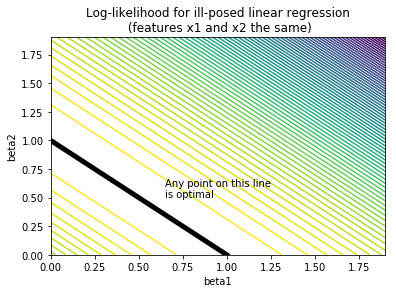

In [6]:
import matplotlib.pyplot as plt 
def plot_contours(fun,Y,X,beta_range):
    nb = len(beta_range)
    fs = numpy.zeros((nb,nb))
    Beta1,Beta2 = numpy.meshgrid(beta_range,beta_range)
    for (i,beta1) in enumerate(beta_range):    
        for (j,beta2) in enumerate(beta_range):        
            betas = numpy.asarray([[beta1],[beta2]])     #make column vector 
            loglik,_ = fun(Y,X,betas)                    #don
            fs[i,j] = loglik

    levels=numpy.arange(numpy.min(fs),numpy.max(fs),5)
    plt.contour(Beta1,Beta2,fs,levels=levels)
    plt.xlabel('beta1')
    plt.ylabel('beta2')

def linear_regression_log_likelihood(Y,X,beta):    
    Yhat = numpy.dot(X,beta) 
    res = Y - Yhat    
    loglik = -0.5*numpy.dot(res.transpose(),res)
    grad = numpy.dot(res.transpose(),X)
    return loglik,grad

N = 100;
x1 = numpy.random.randn(N,1)
x2 = x1
Y = 0.5*x1 + 0.5*x2 + 0.1*numpy.random.randn(N,1)
X = numpy.hstack((x1,x2))
beta_range = numpy.arange(0.0,2.0,0.1)
plot_contours(linear_regression_log_likelihood,Y,X,beta_range)
plt.plot([0.0,1.0],[1.0,0],'k',linewidth=5.0) 
plt.annotate('Any point on this line\nis optimal',(0.65,0.5))
plt.title('Log-likelihood for ill-posed linear regression\n (features x1 and x2 the same)')


Line Search failed. Iteration:  48


Text(0.5,1,'Log-likelihood for ridge penalized regression')

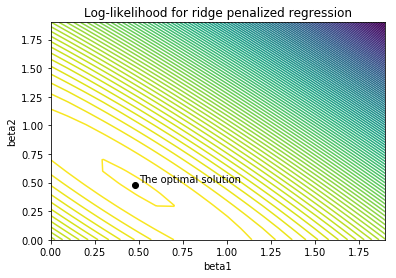

In [7]:
def ridge_regression_log_likelihood(Y,X,beta,lam=10.0):    
    Yhat = numpy.dot(X,beta) 
    res = Y - Yhat    
    loglik = -0.5*numpy.dot(res.transpose(),res) 
    loglik = loglik - lam/2.0*numpy.dot(beta.transpose(),beta)    
    grad = numpy.dot(X.transpose(),res) + lam*beta
    return loglik,grad

N = 100;
x1 = numpy.random.randn(N,1)
x2 = x1
Y = 0.5*x1 + 0.5*x2 + 0.001*numpy.random.randn(N,1)
X = numpy.hstack((x1,x2))
beta_range = numpy.arange(0.0,2.0,0.1)
plot_contours(ridge_regression_log_likelihood,Y,X,beta_range)

# optimize ridge regression 
f = lambda beta: ridge_regression_log_likelihood(Y,X,beta) 
init_beta = numpy.asarray([[0.0],[0.0]])
_,beta_mle,_,_ = gradient_ascent(f,init_beta,0.1,100)
plt.plot(beta_mle[0],beta_mle[1],'ko',linewidth=5.0) 
plt.annotate('The optimal solution',(0.5,0.5))
plt.title('Log-likelihood for ridge penalized regression')

# Ridge regression -- computing gradients

Ridge regression will break ties and try to make similar predictors have similar weights.
$$
\loglik(\beta\given\yy,\xx) =  -\frac{1}{2\sigma^2}\norm{\yy -  \beta_0 - X\beta}^2  \underbrace{-\lambda\norm{\beta}^2}_{\textrm{ridge penalty}}+ \textrm{const.}
$$

One convenient aspect of adding regularization to objectives is that gradients add up
$$
\nabla \left[f(\theta) + g(\theta)\right] = \nabla f(\theta) + \nabla g(\theta)
$$

# Ridge regression -- computing gradients

$$
\nabla \left[f(\theta) - \lambda\norm{\theta}^2\right] = \nabla f(\theta) - \lambda\theta
$$

Thus gradients for ridge regression are simply
$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} &= \frac{1}{\sigma^2}(\yy-\beta_0\ones -X\beta)^T\ones \\
\nabla_\beta \loglik(\beta\given\yy,\xx) &= \frac{1}{\sigma^2}(\yy-\beta_0\ones -X\beta)^TX - \lambda\beta
\end{aligned}
$$
Note that $\beta_0$ is **not** regularized.

# Ridge regression -- matrix form
$$
-\frac{1}{2\sigma^2}(\yy -  X\beta)^T(\yy -  X\beta)  - \frac{\lambda}{2}\beta^T\beta
$$

Gradient equated to zero
$$
\nabla_\beta \loglik(\beta\given\yy,\xx) = \frac{1}{\sigma^2}X^T(\yy-\beta_0\ones -X\beta) - \lambda\beta = 0
$$
yields
$$
\beta^{\MLE} = (X^TX + \lambda\sigma^2 I)^{-1}(X^Ty)
$$
where $I$ is identity matrix.
Contrast this to closed form solution of linear regression
$$
\beta^{\textrm{MLE}} = (X^TX)^{-1}X^T\yy
$$

# Today we covered

1. Reviewed linear regression and gradient ascent 
2. Linear regression in matrix form.
3. Introduced the concept of regularization 
4. Introduced ridge regression as an approach to dealing with correlated predictors


